In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [88]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/Samsung-Galaxy-Mint-128GB-Storage/dp/B0CJ4S724M/ref=sr_1_5?crid=3NANPH8L9X7HF&dib=eyJ2IjoiMSJ9.H6555-blSvwFZW0qW21NCkC9LbkYWMYNktcIesMifjWo4mekTKLCC_QpnAtP_1zEGpBVU3wpXv_F5NchuBSHg7RZajs-U_7c0uVCt9sebYIhCAFhg5UvX37Y_vLefoD76iFO66AkG-SB3yOZpHBXoBFSUhsvSTJ_-8H5MUugNX8lb6Q4ITDrwF6WUBRZcM1oGvoKy9lg23ZTaoCGMHuEzDd9beZd7XHuBIjCaBFmkEI.1rYxOm3E66UBCj07dN_LNxxNoa_DXhNT7402aHTLVVo&dib_tag=se&keywords=samsung%2Bgalaxy%2Bs22&qid=1708069076&sprefix=samsung%2Bgalaxy%2Bs2%2Caps%2C220&sr=8-5&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [89]:
def get_soup(url):
    r = requests.get(url, headers=headers, params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [90]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip().split('\n')[1],
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [91]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,100)):
    soup = get_soup(f'https://www.amazon.in/Samsung-Galaxy-Mint-128GB-Storage/product-reviews/B0CJ4S724M/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5016\1420738470.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/99 [00:00<?, ?it/s]

In [92]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df.shape

(160, 4)

In [93]:
df

,Rating,Title,Review,Review_Date
0,5.0,Performance is Up to mark. After one month rev...,"I never use samsung before this, I was oneplus...",11 November 2023
1,4.0,Almost a great phone,The media could not be loaded.\n ...,20 January 2024
2,5.0,Welcome to Samsung but..,It's been a month since I purchased the phone....,5 December 2023
3,1.0,Heating Machine for Normal User,"Hi,After 20 days usage I am writing this revie...",12 November 2023
4,3.0,"Phone is good, battry is bad, very bad",i am gonna mention CONS only except for 1 pro...,30 November 2023
...,...,...,...,...
155,5.0,Good mobile worth every penny.,Good camera. Good display. Excellent speed. G...,29 December 2023
156,4.0,Not so valuable in 50k but camera & sound mind...,I have been using this since 2 month.Camera an...,2 December 2023
157,5.0,Living upto the FE Fame,Its an amazing phone though being FE version. ...,8 February 2024
158,4.0,Almost best but !!,Heavy battery drainage...And sometimes looks o...,6 February 2024


In [94]:
df.to_csv("Amazon_Reviews.csv")

# Importing Libraries

In [95]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy

In [96]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

In [97]:
reviews = df.copy()

In [98]:
reviews.head()

,Rating,Title,Review,Review_Date
0,5.0,Performance is Up to mark. After one month rev...,"I never use samsung before this, I was oneplus...",11 November 2023
1,4.0,Almost a great phone,The media could not be loaded.\n ...,20 January 2024
2,5.0,Welcome to Samsung but..,It's been a month since I purchased the phone....,5 December 2023
3,1.0,Heating Machine for Normal User,"Hi,After 20 days usage I am writing this revie...",12 November 2023
4,3.0,"Phone is good, battry is bad, very bad",i am gonna mention CONS only except for 1 pro...,30 November 2023


In [99]:
reviews.Rating.describe()

count    160.000000
mean       4.000000
std        1.186931
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [100]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,"I never use samsung before this, I was oneplus...",197
1,The media could not be loaded.\n ...,250
2,It's been a month since I purchased the phone....,102
3,"Hi,After 20 days usage I am writing this revie...",299
4,i am gonna mention CONS only except for 1 pro...,133


In [101]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,"I never use samsung before this, I was oneplus...",1137
1,The media could not be loaded.\n ...,1305
2,It's been a month since I purchased the phone....,637
3,"Hi,After 20 days usage I am writing this revie...",1673
4,i am gonna mention CONS only except for 1 pro...,662


In [102]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,"I never use samsung before this, I was oneplus...",4.801020
1,The media could not be loaded.\n ...,4.468085
2,It's been a month since I purchased the phone....,5.254902
3,"Hi,After 20 days usage I am writing this revie...",4.598662
4,i am gonna mention CONS only except for 1 pro...,4.045802


In [103]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,"I never use samsung before this, I was oneplus...",54
1,The media could not be loaded.\n ...,91
2,It's been a month since I purchased the phone....,33
3,"Hi,After 20 days usage I am writing this revie...",105
4,i am gonna mention CONS only except for 1 pro...,55


In [104]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,"I never use samsung before this, I was oneplus...",0
1,The media could not be loaded.\n ...,0
2,It's been a month since I purchased the phone....,0
3,"Hi,After 20 days usage I am writing this revie...",0
4,i am gonna mention CONS only except for 1 pro...,0


In [105]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,"I never use samsung before this, I was oneplus...",12
1,The media could not be loaded.\n ...,0
2,It's been a month since I purchased the phone....,0
3,"Hi,After 20 days usage I am writing this revie...",4
4,i am gonna mention CONS only except for 1 pro...,7


In [106]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,"I never use samsung before this, I was oneplus...",16
1,The media could not be loaded.\n ...,8
2,It's been a month since I purchased the phone....,3
3,"Hi,After 20 days usage I am writing this revie...",11
4,i am gonna mention CONS only except for 1 pro...,3


In [107]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [108]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I never use samson before this, I was onerous ...
1    The media could not be loaded.\n              ...
2    It's been a month since I purchased the phone....
3    I,After 20 days usage I am writing this review...
4    i am donna mention CONS only  except for 1 pro...
Name: Review, dtype: object

# Feature Engineering

In [109]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0      11
1      20
2       5
3      12
4      30
       ..
155    29
156     2
157     8
158     6
159    10
Name: Review_Date, Length: 160, dtype: object 
 0      November
1       January
2      December
3      November
4      November
         ...   
155    December
156    December
157    February
158    February
159    February
Name: Review_Date, Length: 160, dtype: object 
 0      2023
1      2024
2      2023
3      2023
4      2023
       ... 
155    2023
156    2023
157    2024
158    2024
159    2024
Name: Review_Date, Length: 160, dtype: object


In [110]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,11,November,2023
1,20,January,2024
2,5,December,2023
3,12,November,2023
4,30,November,2023
...,...,...,...
155,29,December,2023
156,2,December,2023
157,8,February,2024
158,6,February,2024


In [111]:
df.Month.value_counts()

Month
November    48
December    48
February    48
January     16
Name: count, dtype: int64

In [112]:
order={'Month':{'February':2,'December':12,'November':11,'January':1}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,11
1,1
2,12
3,11
4,11
...,...
155,12
156,12
157,2
158,2


In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       160 non-null    float64
 1   Title        160 non-null    object 
 2   Review       160 non-null    object 
 3   Review_Date  160 non-null    object 
 4   Date         160 non-null    object 
 5   Month        160 non-null    int64  
 6   Year         160 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.9+ KB


In [114]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       160 non-null    float64
 1   Title        160 non-null    object 
 2   Review       160 non-null    object 
 3   Review_Date  160 non-null    object 
 4   Date         160 non-null    int64  
 5   Month        160 non-null    int64  
 6   Year         160 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 8.9+ KB


In [115]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,5.0,Performance is Up to mark. After one month rev...,"I never use samsung before this, I was oneplus...",11,11,2023
1,4.0,Almost a great phone,The media could not be loaded.\n ...,20,1,2024
2,5.0,Welcome to Samsung but..,It's been a month since I purchased the phone....,5,12,2023
3,1.0,Heating Machine for Normal User,"Hi,After 20 days usage I am writing this revie...",12,11,2023
4,3.0,"Phone is good, battry is bad, very bad",i am gonna mention CONS only except for 1 pro...,30,11,2023


In [116]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,5.0,Performance is Up to mark. After one month rev...,"I never use samsung before this, I was oneplus...",11 November 2023,11,November,2023
1,4.0,Almost a great phone,The media could not be loaded.\n ...,20 January 2024,20,January,2024
2,5.0,Welcome to Samsung but..,It's been a month since I purchased the phone....,5 December 2023,5,December,2023
3,1.0,Heating Machine for Normal User,"Hi,After 20 days usage I am writing this revie...",12 November 2023,12,November,2023
4,3.0,"Phone is good, battry is bad, very bad",i am gonna mention CONS only except for 1 pro...,30 November 2023,30,November,2023
...,...,...,...,...,...,...,...
155,5.0,Good mobile worth every penny.,Good camera. Good display. Excellent speed. G...,29 December 2023,29,December,2023
156,4.0,Not so valuable in 50k but camera & sound mind...,I have been using this since 2 month.Camera an...,2 December 2023,2,December,2023
157,5.0,Living upto the FE Fame,Its an amazing phone though being FE version. ...,8 February 2024,8,February,2024
158,4.0,Almost best but !!,Heavy battery drainage...And sometimes looks o...,6 February 2024,6,February,2024


# Data Visualization

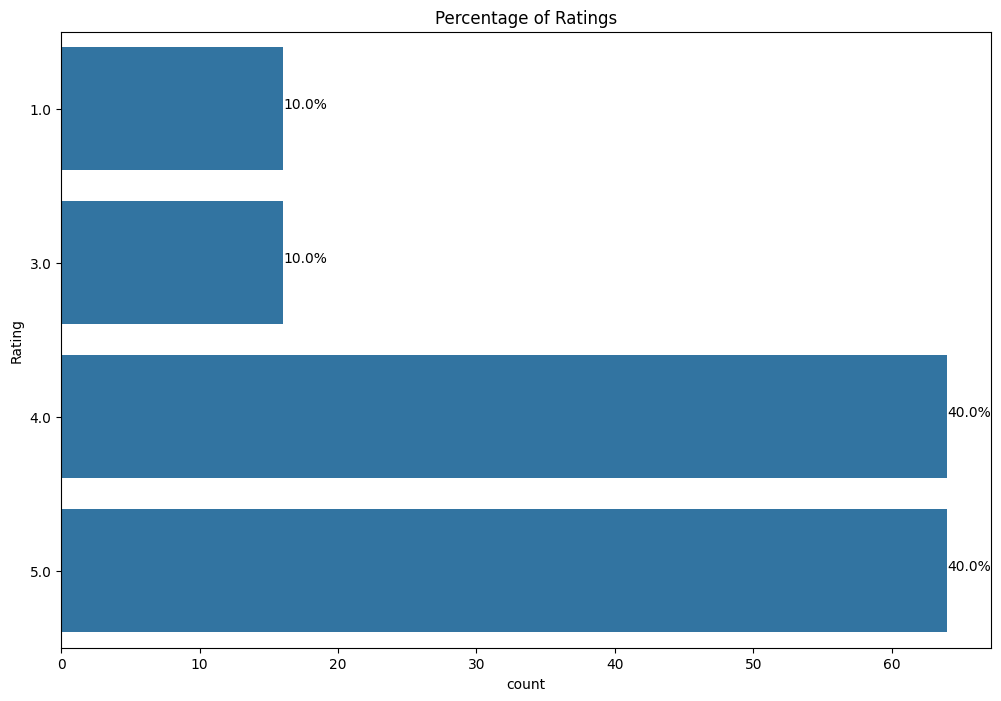

In [117]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

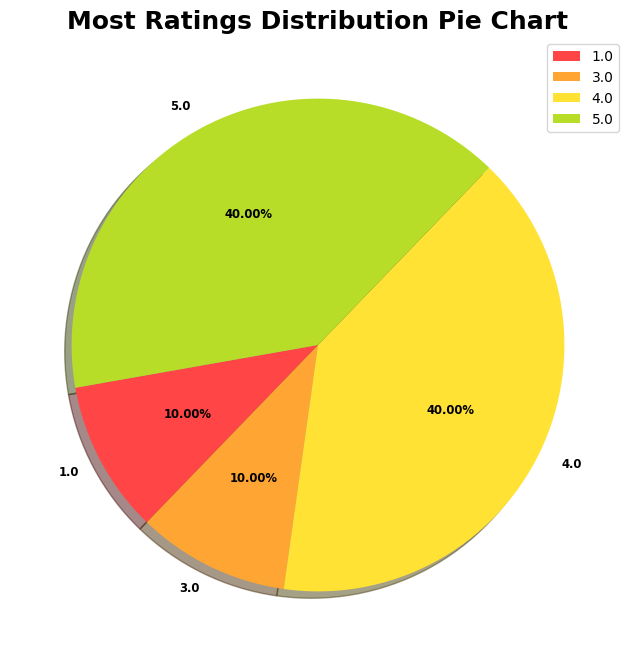

In [118]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

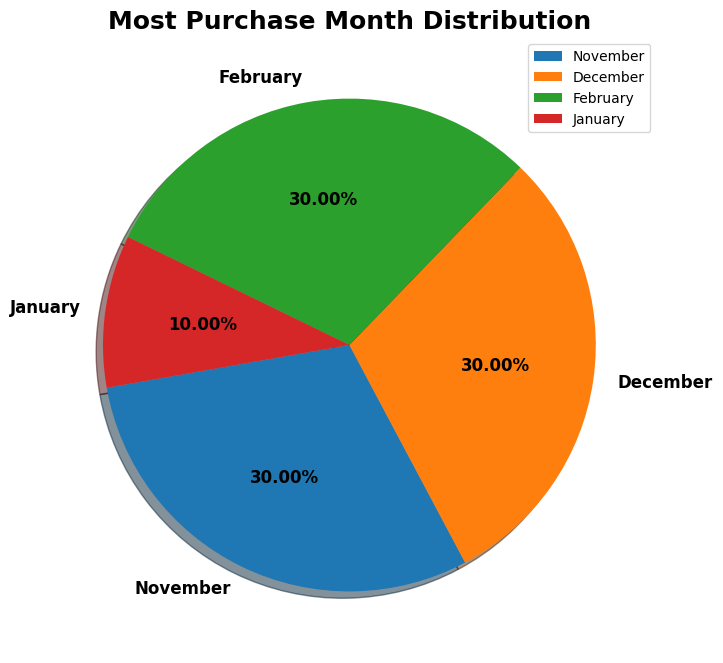

In [119]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

# Basic Text Pre-processing for sentimental analysis

In [120]:
data = df[['Review']]
data

,Review
0,"I never use samsung before this, I was oneplus..."
1,The media could not be loaded.\n ...
2,It's been a month since I purchased the phone....
3,"Hi,After 20 days usage I am writing this revie..."
4,i am gonna mention CONS only except for 1 pro...
...,...
155,Good camera. Good display. Excellent speed. G...
156,I have been using this since 2 month.Camera an...
157,Its an amazing phone though being FE version. ...
158,Heavy battery drainage...And sometimes looks o...


In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data.loc['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [123]:
data['Review']

0         I never use samsung before this, I was oneplus...
1         The media could not be loaded.\n              ...
2         It's been a month since I purchased the phone....
3         Hi,After 20 days usage I am writing this revie...
4         i am gonna mention CONS only  except for 1 pro...
                                ...                        
156       I have been using this since 2 month.Camera an...
157       Its an amazing phone though being FE version. ...
158       Heavy battery drainage...And sometimes looks o...
159       I purchased this s23fe 3 months ago, It got 14...
Review                                                  NaN
Name: Review, Length: 161, dtype: object

In [124]:
data

,Review
0,"I never use samsung before this, I was oneplus..."
1,The media could not be loaded.\n ...
2,It's been a month since I purchased the phone....
3,"Hi,After 20 days usage I am writing this revie..."
4,i am gonna mention CONS only except for 1 pro...
...,...
156,I have been using this since 2 month.Camera an...
157,Its an amazing phone though being FE version. ...
158,Heavy battery drainage...And sometimes looks o...
159,"I purchased this s23fe 3 months ago, It got 14..."


In [126]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data)-1)):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/160 [00:00<?, ?it/s]

In [127]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...


# Text pre-processing technique

In [128]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

### Removing '@names'

In [129]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...
5,good camera good display excellent speed good ...,Good camera. Good display. Excellent speed. G...
6,using since month camera zooming good camera f...,I have been using this since 2 month.Camera an...
7,amazing phone though fe version excellent fini...,Its an amazing phone though being FE version. ...
8,heavy battery drainage sometimes look ordinary...,Heavy battery drainage...And sometimes looks o...
9,purchased fe month ago got th android update c...,"I purchased this s23fe 3 months ago, It got 14..."


### Removing links (http|https)

In [130]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...
5,good camera good display excellent speed good ...,Good camera. Good display. Excellent speed. G...
6,using since month camera zooming good camera f...,I have been using this since 2 month.Camera an...
7,amazing phone though fe version excellent fini...,Its an amazing phone though being FE version. ...
8,heavy battery drainage sometimes look ordinary...,Heavy battery drainage...And sometimes looks o...
9,purchased fe month ago got th android update c...,"I purchased this s23fe 3 months ago, It got 14..."


### Removing reviews with empty text

In [131]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...
5,good camera good display excellent speed good ...,Good camera. Good display. Excellent speed. G...
6,using since month camera zooming good camera f...,I have been using this since 2 month.Camera an...
7,amazing phone though fe version excellent fini...,Its an amazing phone though being FE version. ...
8,heavy battery drainage sometimes look ordinary...,Heavy battery drainage...And sometimes looks o...
9,purchased fe month ago got th android update c...,"I purchased this s23fe 3 months ago, It got 14..."


### Dropping duplicated rows

In [132]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...
5,good camera good display excellent speed good ...,Good camera. Good display. Excellent speed. G...
6,using since month camera zooming good camera f...,I have been using this since 2 month.Camera an...
7,amazing phone though fe version excellent fini...,Its an amazing phone though being FE version. ...
8,heavy battery drainage sometimes look ordinary...,Heavy battery drainage...And sometimes looks o...
9,purchased fe month ago got th android update c...,"I purchased this s23fe 3 months ago, It got 14..."


### Resetting index

In [133]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...
5,good camera good display excellent speed good ...,Good camera. Good display. Excellent speed. G...
6,using since month camera zooming good camera f...,I have been using this since 2 month.Camera an...
7,amazing phone though fe version excellent fini...,Its an amazing phone though being FE version. ...
8,heavy battery drainage sometimes look ordinary...,Heavy battery drainage...And sometimes looks o...
9,purchased fe month ago got th android update c...,"I purchased this s23fe 3 months ago, It got 14..."


### Removing punctutation, numbers, and special characters

In [134]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [135]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...
5,good camera good display excellent speed good ...,Good camera. Good display. Excellent speed. G...
6,using since month camera zooming good camera f...,I have been using this since 2 month.Camera an...
7,amazing phone though fe version excellent fini...,Its an amazing phone though being FE version. ...
8,heavy battery drainage sometimes look ordinary...,Heavy battery drainage...And sometimes looks o...
9,purchased fe month ago got th android update c...,"I purchased this s23fe 3 months ago, It got 14..."


### Removing emojis

In [136]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [137]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...
5,good camera good display excellent speed good ...,Good camera. Good display. Excellent speed. G...
6,using since month camera zooming good camera f...,I have been using this since 2 month.Camera an...
7,amazing phone though fe version excellent fini...,Its an amazing phone though being FE version. ...
8,heavy battery drainage sometimes look ordinary...,Heavy battery drainage...And sometimes looks o...
9,purchased fe month ago got th android update c...,"I purchased this s23fe 3 months ago, It got 14..."


In [138]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus...","[never, use, samsung, oneplus, iphone, user, c..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...,"[medium, could, loaded, using, phone, couple, ..."
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....,"[month, since, purchased, phone, experience, g..."
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie...","[hi, day, usage, writing, review, con, beside,..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...,"[gon, na, mention, con, except, pro, whic, nig..."
5,good camera good display excellent speed good ...,Good camera. Good display. Excellent speed. G...,"[good, camera, good, display, excellent, speed..."
6,using since month camera zooming good camera f...,I have been using this since 2 month.Camera an...,"[using, since, month, camera, zooming, good, c..."
7,amazing phone though fe version excellent fini...,Its an amazing phone though being FE version. ...,"[amazing, phone, though, fe, version, excellen..."
8,heavy battery drainage sometimes look ordinary...,Heavy battery drainage...And sometimes looks o...,"[heavy, battery, drainage, sometimes, look, or..."
9,purchased fe month ago got th android update c...,"I purchased this s23fe 3 months ago, It got 14...","[purchased, fe, month, ago, got, th, android, ..."


In [139]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

### Removing stopwords

In [140]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus..."
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie..."
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...
5,good camera good display excellent speed good ...,Good camera. Good display. Excellent speed. G...
6,using since month camera zooming good camera f...,I have been using this since 2 month.Camera an...
7,amazing phone though fe version excellent fini...,Its an amazing phone though being FE version. ...
8,heavy battery drainage sometimes look ordinary...,Heavy battery drainage...And sometimes looks o...
9,purchased fe month ago got th android update c...,"I purchased this s23fe 3 months ago, It got 14..."


### Tokenizing

In [141]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'using', 'phone', 'couple', 'month', 'pretty', 'satisfied', 'got', 'around', 'k', 'let', 'break', 'like', 'dislike', 'phone', 'like', 'camera', 'absolutely', 'wonderful', 'used', 'click', 'incredible', 'picture', 'x', 'lens', 'help', 'lot', 'get', 'sharper', 'zoomed', 'image', 'video', 'super', 'stable', 'well', 'portrait', 'shot', 'look', 'stunning', 'speaker', 'extremely', 'good', 'someone', 'love', 'listen', 'music', 'speaker', 'job', 'incredibly', 'well', 'samsung', 'one', 'ui', 'course', 'get', 'customise', 'almost', 'anything', 'super', 'clean', 'ui', 'handle', 'everyday', 'task', 'multitasking', 'smoothly', 'play', 'game', 'phone', 'issue', 'processor', 'dislike', 'battery', 'drain', 'fast', 'heavy', 'usage', 'major', 'complain', 'phone', 'normal', 'usage', 'phone', 'give', 'around', 'hr', 'screen', 'time', 'average', 'go', 'upto', 'hr', 'heavy', 'usage', 'expect', 'hr', 'screen', 'time', 'depending', 'task', 'phone', 'get', 'warm', 'overhe

In [142]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [never, use, samsung, oneplus, iphone, user, c...
1    [medium, could, loaded, using, phone, couple, ...
2    [month, since, purchased, phone, experience, g...
3    [hi, day, usage, writing, review, con, beside,...
4    [gonna, mention, con, except, pro, whic, night...
5    [good, camera, good, display, excellent, speed...
6    [using, since, month, camera, zooming, good, c...
7    [amazing, phone, though, fe, version, excellen...
8    [heavy, battery, drainage, sometimes, look, or...
9    [purchased, fe, month, ago, got, th, android, ...
Name: Clean_Reviews, dtype: object

In [143]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['lemmatized'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,lemmatized
0,never use samsung oneplus iphone user chinese ...
1,medium could loaded using phone couple month p...
2,month since purchased phone experience get bea...
3,hi day usage writing review con beside pro con...
4,gonna mention con except pro whic night photo ...
...,...
155,good camera good display excellent speed good ...
156,using since month camera zooming good camera f...
157,amazing phone though fe version excellent fini...
158,heavy battery drainage sometimes look ordinary...


# Fetch Sentiments

In [144]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [145]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,count
Clean_Reviews,
pos,160


In [146]:
dataframe.Clean_Reviews[8]

'heavy battery drainage sometimes look ordinary phone usingrest ok bit heavy pricingif would launched would game changeri would recommend buy'

In [147]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.6369}

In [148]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,never use samsung oneplus iphone user chinese ...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp..."
1,medium could loaded using phone couple month p...,"{'neg': 0.049, 'neu': 0.631, 'pos': 0.32, 'com..."
2,month since purchased phone experience get bea...,"{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compou..."
3,hi day usage writing review con beside pro con...,"{'neg': 0.021, 'neu': 0.793, 'pos': 0.186, 'co..."
4,gonna mention con except pro whic night photo ...,"{'neg': 0.105, 'neu': 0.788, 'pos': 0.107, 'co..."


In [149]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,never use samsung oneplus iphone user chinese ...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.9911
1,medium could loaded using phone couple month p...,"{'neg': 0.049, 'neu': 0.631, 'pos': 0.32, 'com...",0.9906
2,month since purchased phone experience get bea...,"{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compou...",0.9766
3,hi day usage writing review con beside pro con...,"{'neg': 0.021, 'neu': 0.793, 'pos': 0.186, 'co...",0.9837
4,gonna mention con except pro whic night photo ...,"{'neg': 0.105, 'neu': 0.788, 'pos': 0.107, 'co...",0.0516


In [150]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,never use samsung oneplus iphone user chinese ...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.9911,Positive
1,medium could loaded using phone couple month p...,"{'neg': 0.049, 'neu': 0.631, 'pos': 0.32, 'com...",0.9906,Positive
2,month since purchased phone experience get bea...,"{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compou...",0.9766,Positive
3,hi day usage writing review con beside pro con...,"{'neg': 0.021, 'neu': 0.793, 'pos': 0.186, 'co...",0.9837,Positive
4,gonna mention con except pro whic night photo ...,"{'neg': 0.105, 'neu': 0.788, 'pos': 0.107, 'co...",0.0516,Positive
...,...,...,...,...
155,good camera good display excellent speed good ...,"{'neg': 0.0, 'neu': 0.359, 'pos': 0.641, 'comp...",0.9442,Positive
156,using since month camera zooming good camera f...,"{'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'comp...",0.9042,Positive
157,amazing phone though fe version excellent fini...,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.9891,Positive
158,heavy battery drainage sometimes look ordinary...,"{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...",0.6369,Positive


In [151]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
0,Positive,160


__Conclusion:__ 

It is not shwoing any review as negative, so we should use some other method.

## using TextBlob

In [166]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [167]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,144
neg,16


__Note:__

Because only 10% of the reviews has 1 star rating, and remaining is 3,4, or 5 stars. So, it makes quite some sense.

In [182]:
sentiments_using_textblob

0      pos
1      pos
2      pos
3      pos
4      pos
      ... 
155    pos
156    pos
157    pos
158    neg
159    pos
Name: Clean_Reviews, Length: 160, dtype: object

In [184]:
dataframe['sentiments'] = sentiments_using_textblob

In [185]:
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,sentiments
0,never use samsung oneplus iphone user chinese ...,"I never use samsung before this, I was oneplus...",pos
1,medium could loaded using phone couple month p...,The media could not be loaded.\n ...,pos
2,month since purchased phone experience get bea...,It's been a month since I purchased the phone....,pos
3,hi day usage writing review con beside pro con...,"Hi,After 20 days usage I am writing this revie...",pos
4,gonna mention con except pro whic night photo ...,i am gonna mention CONS only except for 1 pro...,pos


In [186]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

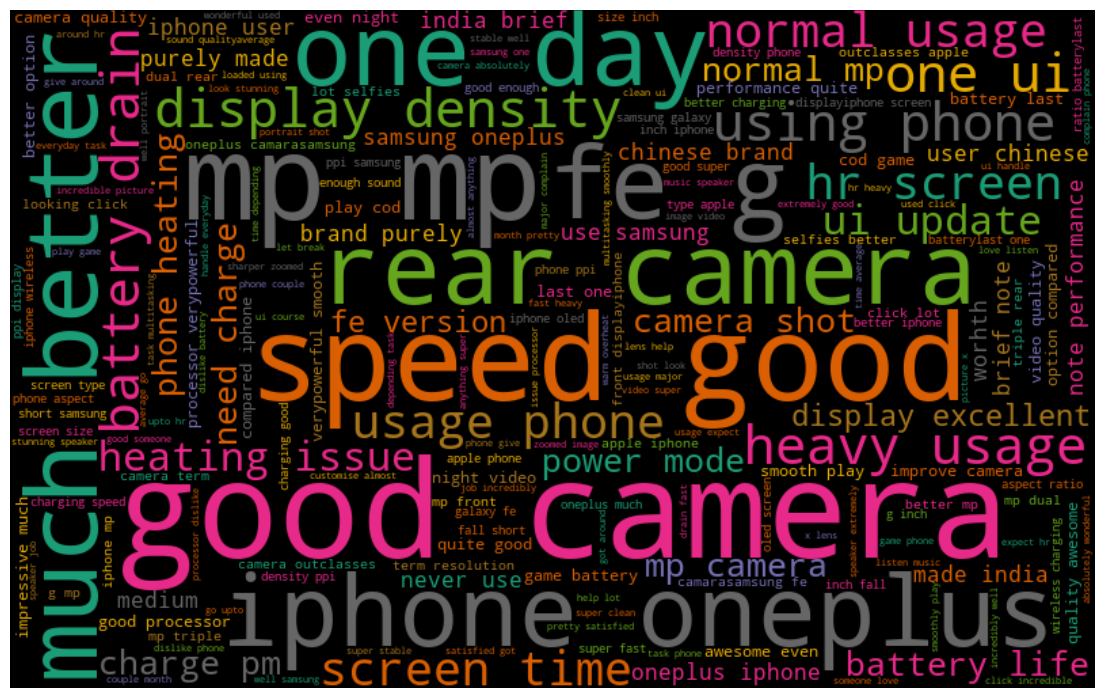

In [187]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiments == 'pos']])
generate_wordcloud(all_words)

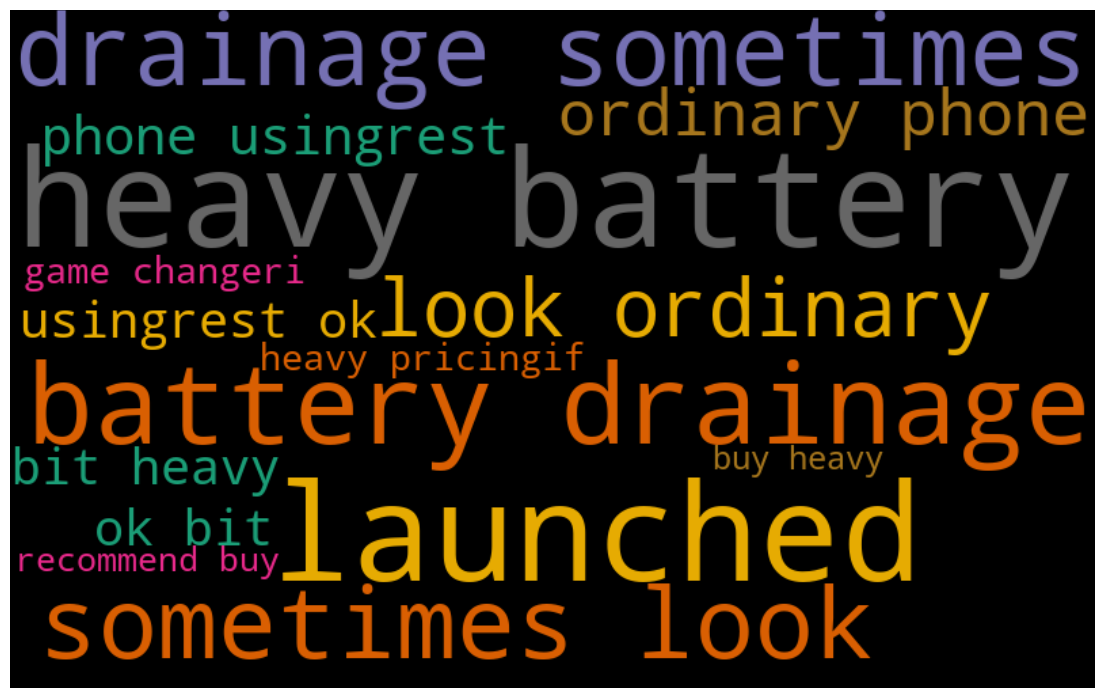

In [189]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiments== 'neg']])
generate_wordcloud(all_words)